<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Prueba_chi_Cuadrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#prueba chi
import numpy as np
from scipy.stats import chi2, chisquare
import matplotlib.pyplot as plt

In [2]:
def p_chi2_unif(data, m = 5, alpha_1 = 0.95):
  d = np.array(data)
  n = len(data)

  a = np.floor(min(d))
  b = np.ceil(max(d))
  p = (b-a)/m

  o, l1, l2 = [], a, a+p
  for i in range(m):
    o.append(list((d>=l1) == (d<l2)).count(True))
    l1 = l2
    l2 = l2 + p

  print(o)
  e = n/m * np.ones(m)

  dif = o - e

  chi_est_p = sum(dif**2)/(n/m)

  chi_crit = chi2.ppf(alpha_1, m-1)

  if chi_est_p < chi_crit:
    mensaje = "No rechazo, distro normal"
  else:
    mensaje = "Rechazo, distro no normal"

  return chi_est_p, chi_crit, mensaje

[9, 7, 9, 7, 8]
(0.5, 9.487729036781154, 'No rechazo, distro normal')

[6, 12, 13, 7, 12]
(4.2, 9.487729036781154, 'No rechazo, distro normal')


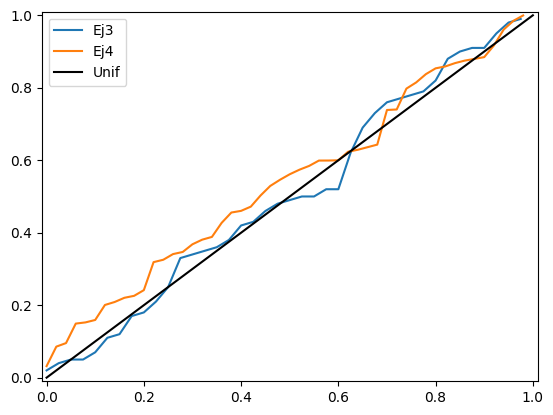

In [3]:
if __name__ == "__main__":
  d3 = np.array([38, 33, 25, 5, 69, 35, 98, 52, 12, 79, 50, 46, 95, 42, 49, 11,
                78, 34, 2, 43, 7, 50, 5, 91, 77, 18, 21, 4, 17, 62, 91, 36, 48,
                88, 52, 76, 99, 73, 82, 90])/100

  d4 = np.array([0.8797, 0.3884, 0.6289, 0.8750, 0.5999, 0.8589, 0.9996, 0.2415,
                 0.3808, 0.9606, 0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431,
                 0.7387, 0.5613, 0.0318, 0.7401, 0.4557, 0.1592, 0.8536, 0.8846,
                 0.3410, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992, 0.9170, 0.2204,
                 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027,
                 0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.4720, 0.4272,
                 0.6360, 0.0954])


  print(p_chi2_unif(d3, 5, 0.95))
  # print(chisquare([9, 7, 9, 7, 8]))

  print()

  print(p_chi2_unif(d4, 5, 0.95))
  # print(chisquare([6, 12, 13, 7, 12]))
  p3 = 1/len(d3)
  plt.plot(np.arange(0,1,p3),np.sort(d3), label = "Ej3")

  p4 = 1/len(d4)
  plt.plot(np.arange(0,1,p4),np.sort(d4), label = "Ej4")
  plt.plot([0,1],label='Unif', color = "k")

  plt.legend()
  plt.xlim(-0.01,1.01)
  plt.ylim(-0.01,1.01)

  #No se rechaza la hipótesis nula, por ende podemos decir que aparentan ser lo suficientemente parecidas a una uniforme